In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
X_tf = X.copy()

X_tf["MedInc"], param = stats.boxcox(X["MedInc"])
print("Optimal lambda: ", param)

Optimal lambda:  0.09085449361507383


In [5]:
def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

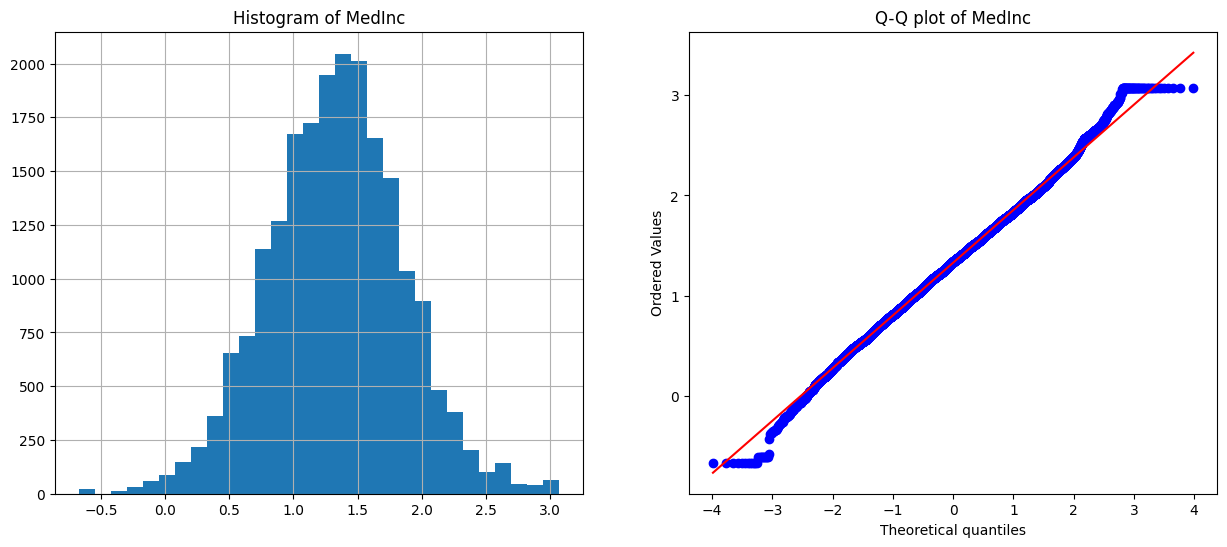

In [6]:
diagnostic_plots(X_tf, "MedInc")

In [8]:
# Same with scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
variables = list(X.columns)
variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [10]:
def make_qqplot(df):
    plt.figure(figsize=(10,6), constrained_layout=True)
    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        var = variables[i]
        stats.probplot((df[var]), dist="norm", plot=plt)
        ax.set_title(var)
    plt.show()

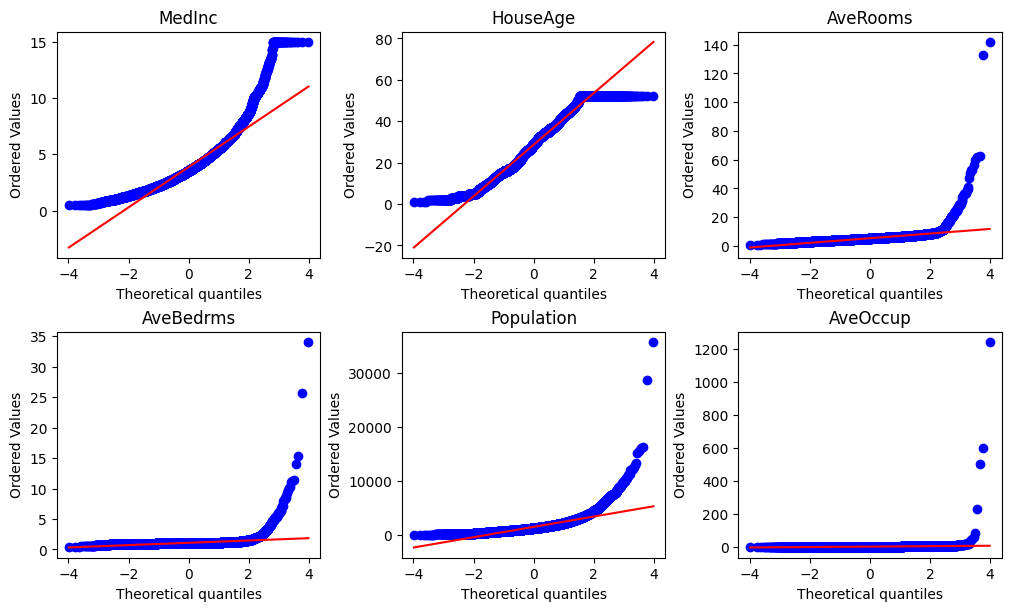

In [11]:
make_qqplot(X)

In [12]:
transformer = PowerTransformer(method="box-cox", standardize=False)
transformer.set_output(transform="pandas")

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [13]:
transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [14]:
X_tf = transformer.transform(X)
X_tf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.337069,23.723216,1.475350,0.023085,12.308116,0.756645
1,2.333598,13.286954,1.410978,-0.029195,22.335341,0.628291
2,2.171691,29.017459,1.568866,0.066936,14.082654,0.814315
3,1.873879,29.017459,1.370082,0.066615,14.598635,0.754737
4,1.432988,29.017459,1.415020,0.073214,14.654092,0.651500
...,...,...,...,...,...,...
20635,0.453991,15.488038,1.284035,0.113228,16.535104,0.757908
20636,0.979953,11.583480,1.399297,0.221297,12.704453,0.878932
20637,0.543627,11.003934,1.303230,0.103551,17.412274,0.694971
20638,0.642493,11.583480,1.317575,0.139802,15.901621,0.632710


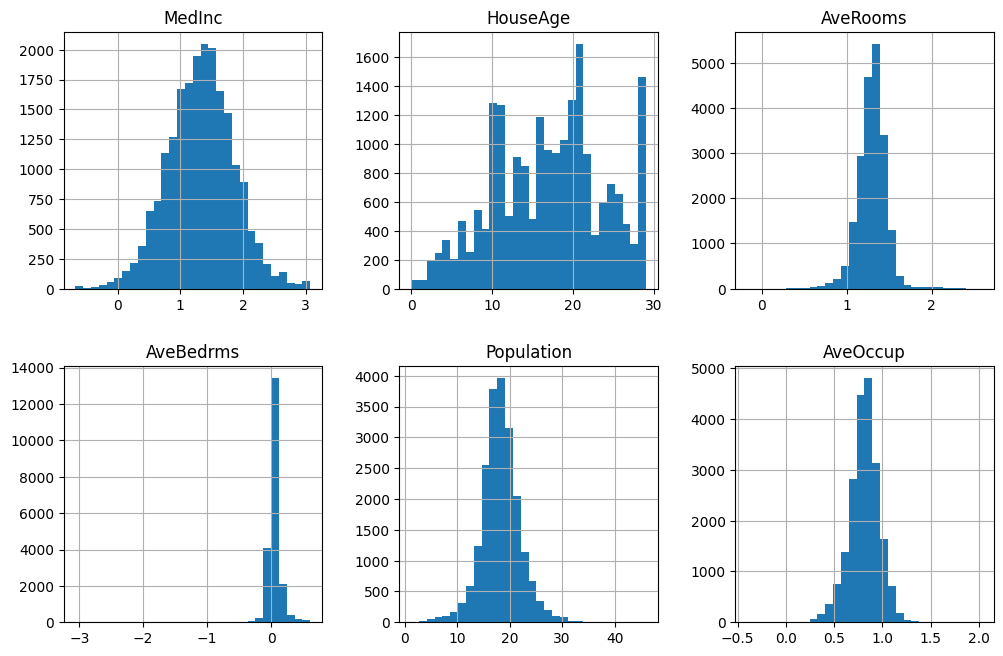

In [15]:
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()